In [1]:
!pip install graphviz

# 2. Decision Tree

## 2.1. Data collection and Introduction

https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation

instr: Instructor's identifier; values taken from {1,2,3}  
class: Course code (descriptor); values taken from {1-13}  
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}  
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}  
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}  
Q1: The semester course content, teaching method and evaluation system were provided at the start.  
Q2: The course aims and objectives were clearly stated at the beginning of the period.  
Q3: The course was worth the amount of credit assigned to it.  
Q4: The course was taught according to the syllabus announced on the first day of class.  
Q5: The class discussions, homework assignments, applications and studies were satisfactory.  
Q6: The textbook and other courses resources were sufficient and up to date.  
Q7: The course allowed field work, applications, laboratory, discussion and other studies.  
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.  
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.  
Q10: My initial expectations about the course were met at the end of the period or year.  
Q11: The course was relevant and beneficial to my professional development.  
Q12: The course helped me look at life and the world with a new perspective.  
Q13: The Instructor's knowledge was relevant and up to date.  
Q14: The Instructor came prepared for classes.  
Q15: The Instructor taught in accordance with the announced lesson plan.  
Q16: The Instructor was committed to the course and was understandable.  
Q17: The Instructor arrived on time for classes.  
Q18: The Instructor has a smooth and easy to follow delivery/speech.  
Q19: The Instructor made effective use of class hours.  
Q20: The Instructor explained the course and was eager to be helpful to students.  
Q21: The Instructor demonstrated a positive approach to students.  
Q22: The Instructor was open and respectful of the views of students about the course.  
Q23: The Instructor encouraged participation in the course.  
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.  
Q25: The Instructor responded to questions about the course inside and outside of the course.  
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.  
Q27: The Instructor provided solutions to exams and discussed them with students.  
Q28: The Instructor treated all students in a right and objective manner.  

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

In [2]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("turkiye-student-evaluation_generic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [4]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## 2.2. Explore data and Preprocessing

In [7]:
titles = ['Course code (descriptor); values taken from {1-13}',
"repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}",
'attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}',    
'difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}',
'Q1: The semester course content, teaching method and evaluation system were provided at the start.',
'Q2: The course aims and objectives were clearly stated at the beginning of the period.',
'Q3: The course was worth the amount of credit assigned to it.',
'Q4: The course was taught according to the syllabus announced on the first day of class.',
'Q5: The class discussions, homework assignments, applications and studies were satisfactory.',
'Q6: The textbook and other courses resources were sufficient and up to date.',
'Q7: The course allowed field work, applications, laboratory, discussion and other studies.',
'Q8: The quizzes, assignments, projects and exams contributed to helping the learning.',
'Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.',
'Q10: My initial expectations about the course were met at the end of the period or year.',
'Q11: The course was relevant and beneficial to my professional development.',
'Q12: The course helped me look at life and the world with a new perspective.',
"Q13: The Instructor's knowledge was relevant and up to date.",
'Q14: The Instructor came prepared for classes.',
'Q15: The Instructor taught in accordance with the announced lesson plan.',
'Q16: The Instructor was committed to the course and was understandable.',
'Q17: The Instructor arrived on time for classes.',
'Q18: The Instructor has a smooth and easy to follow delivery/speech.',
'Q19: The Instructor made effective use of class hours.',
'Q20: The Instructor explained the course and was eager to be helpful to students.',
'Q21: The Instructor demonstrated a positive approach to students.',
'Q22: The Instructor was open and respectful of the views of students about the course.',
'Q23: The Instructor encouraged participation in the course.',
'Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.',
'Q25: The Instructor responded to questions about the course inside and outside of the course.',
"Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.",
'Q27: The Instructor provided solutions to exams and discussed them with students.',
'Q28: The Instructor treated all students in a right and objective manner.']
len(titles)

32

In [8]:
col = df.columns[1:]
col

Index(['class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

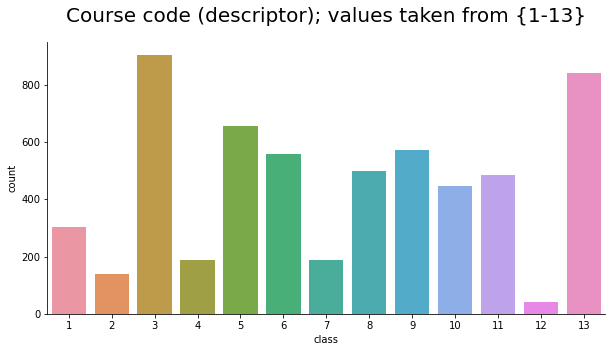

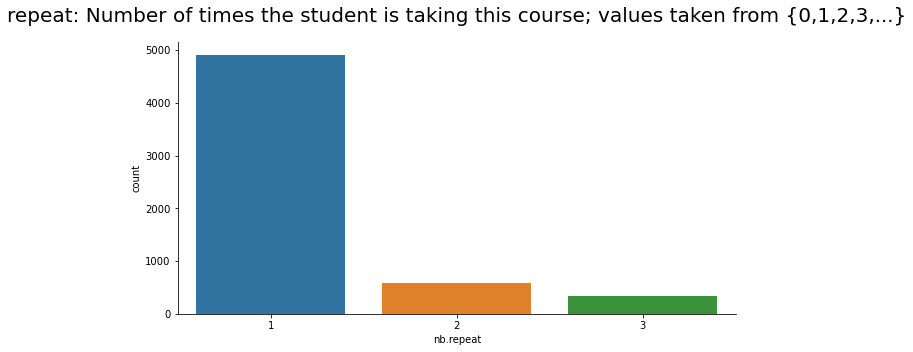

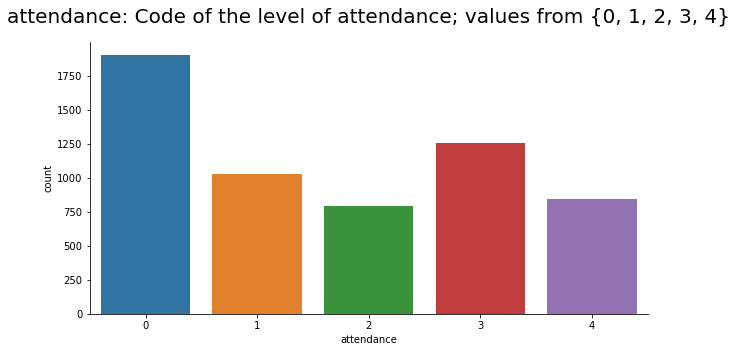

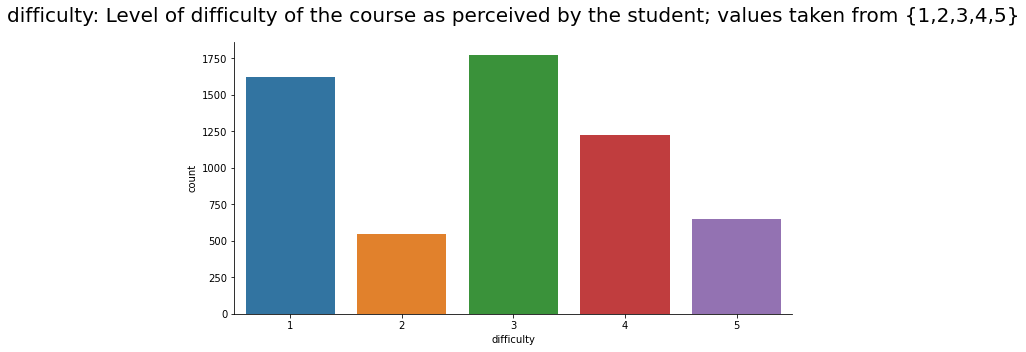

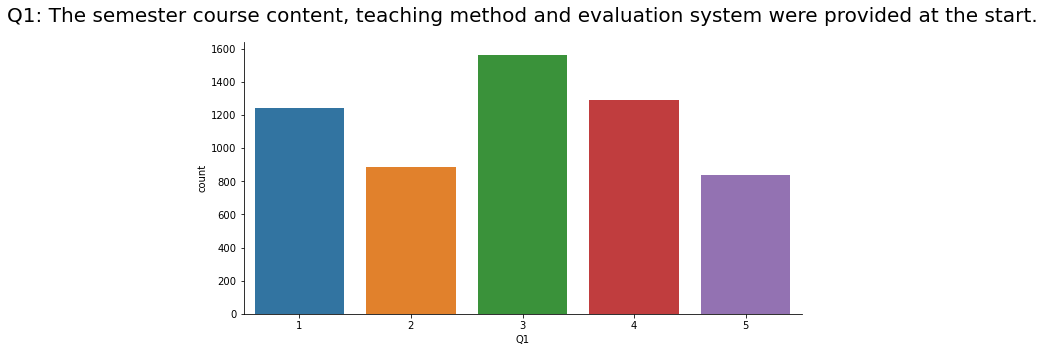

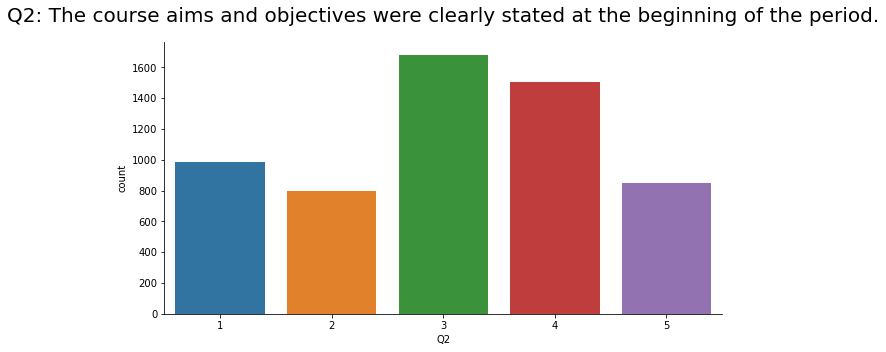

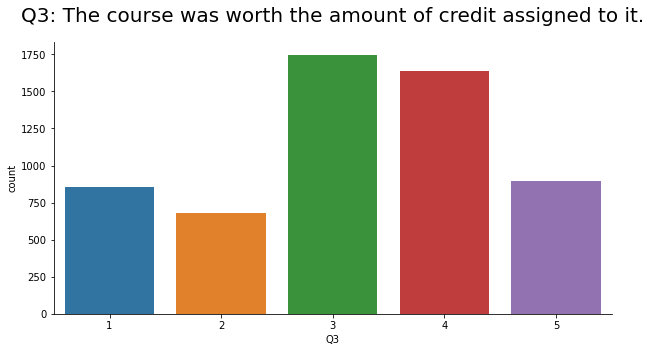

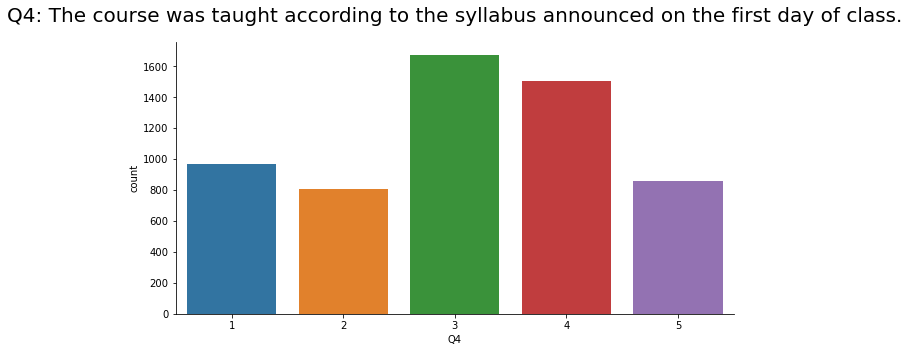

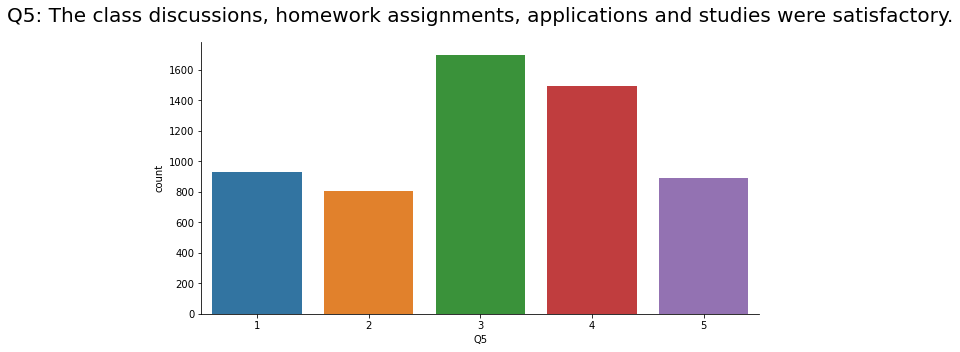

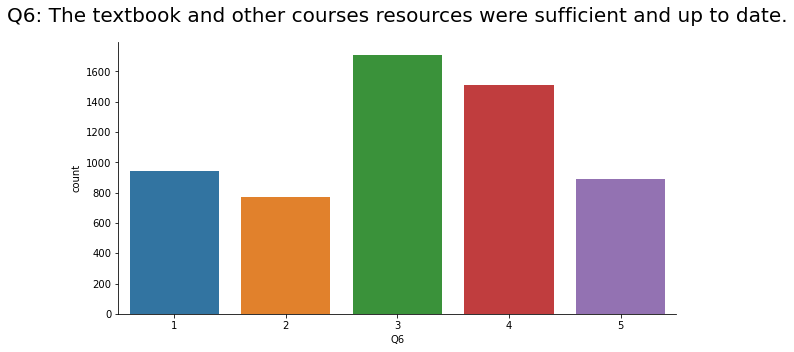

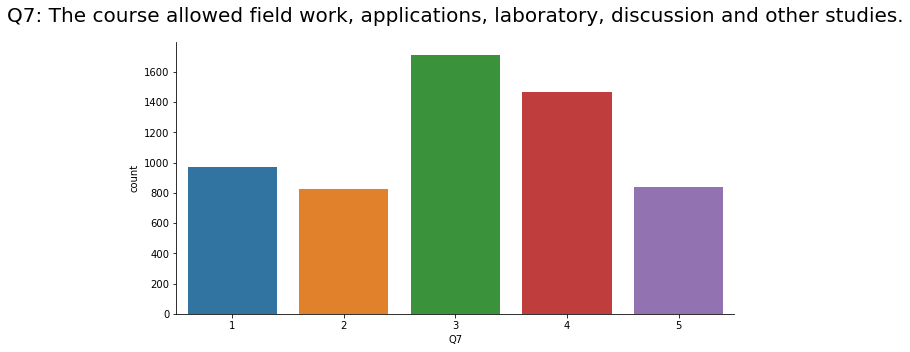

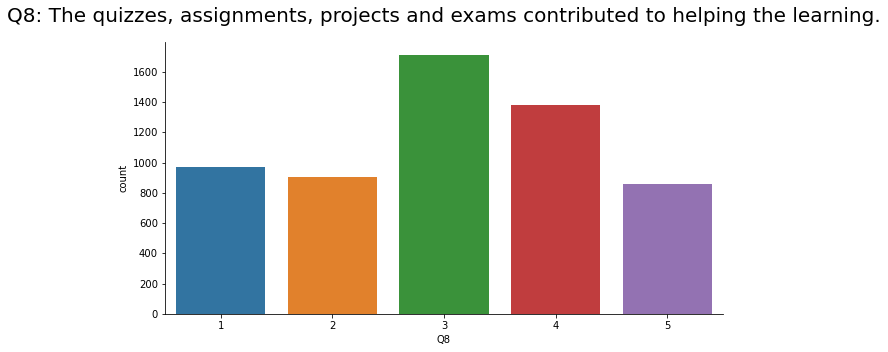

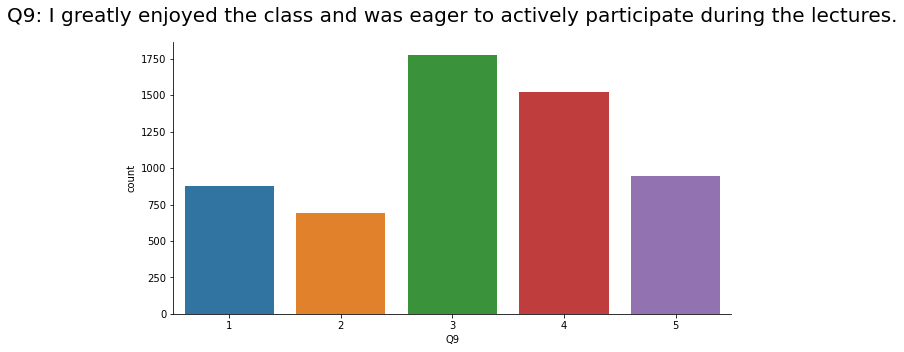

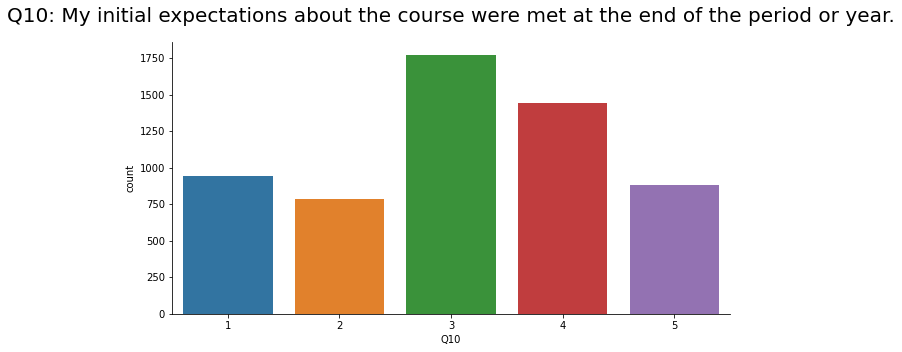

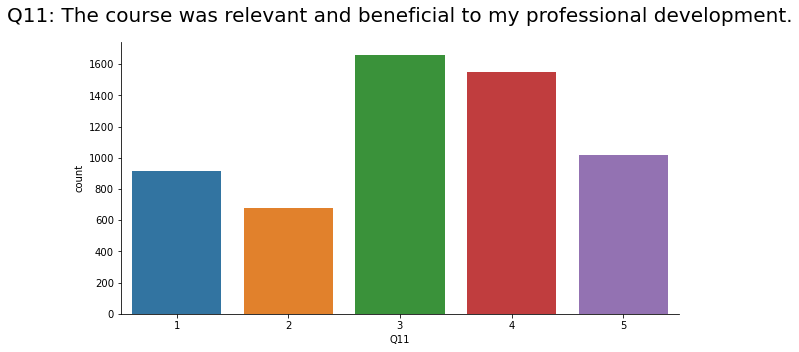

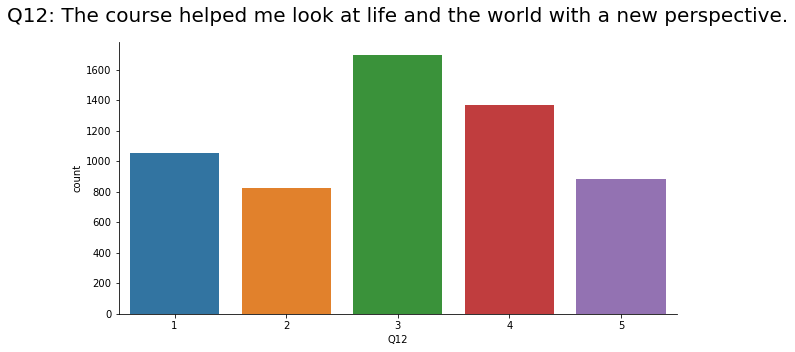

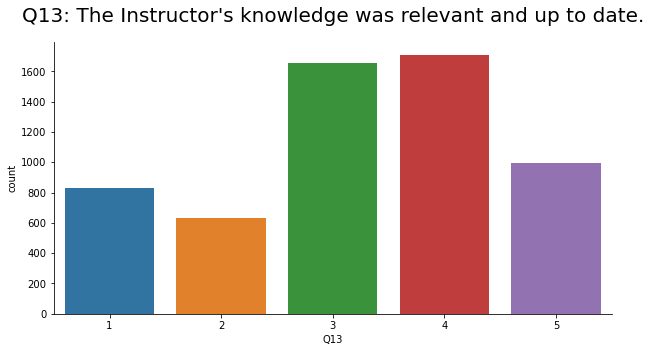

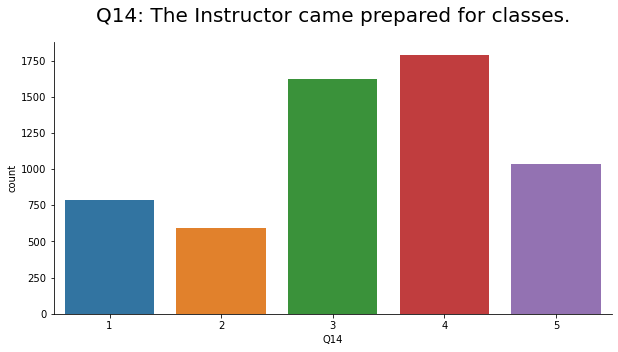

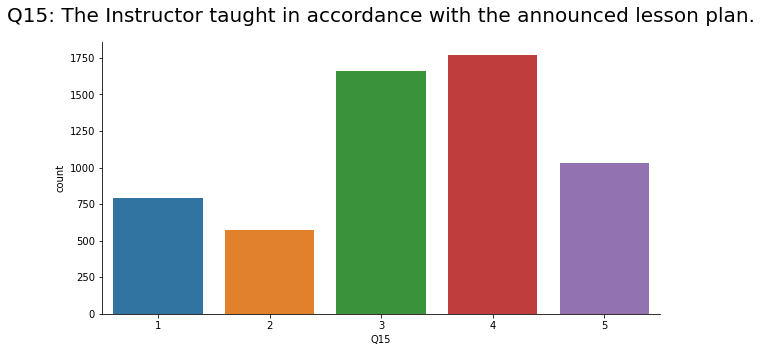

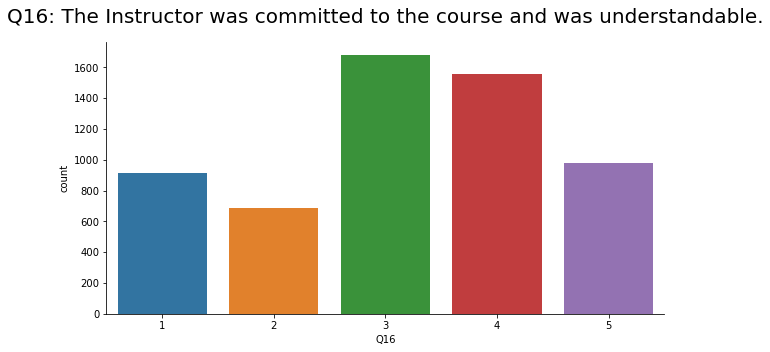

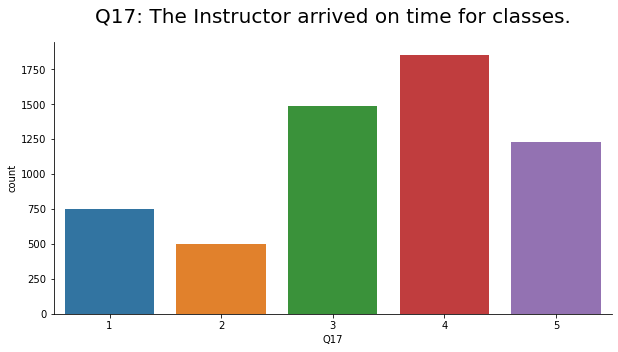

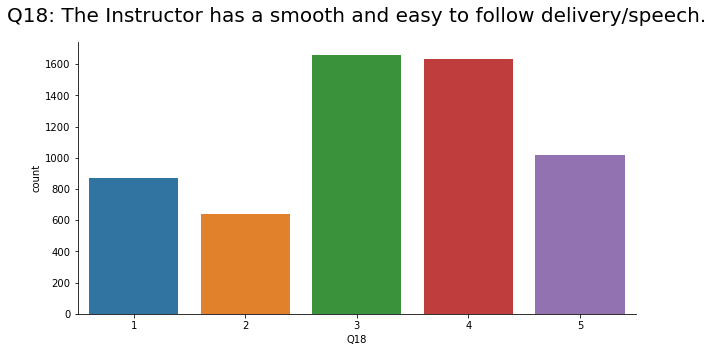

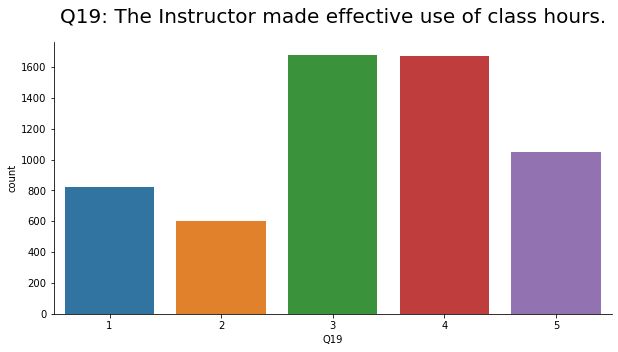

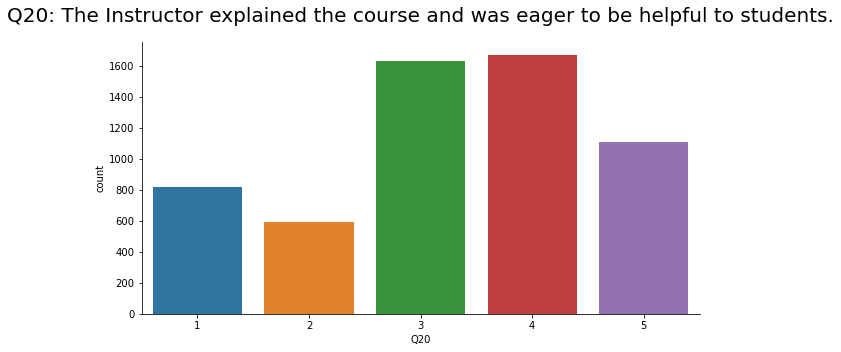

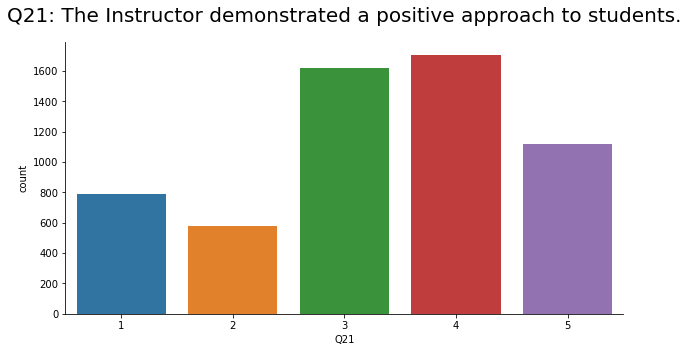

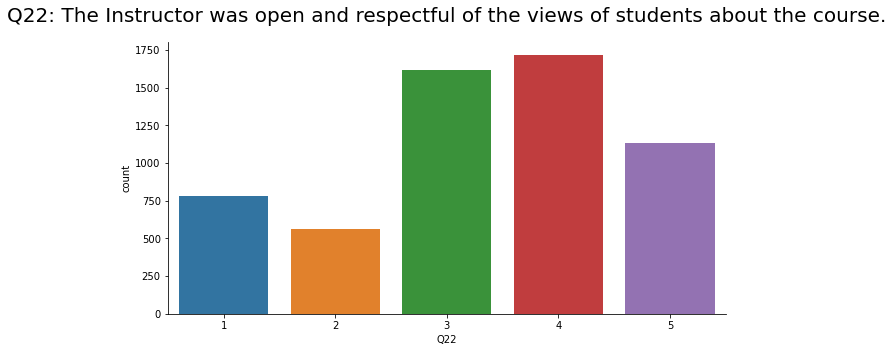

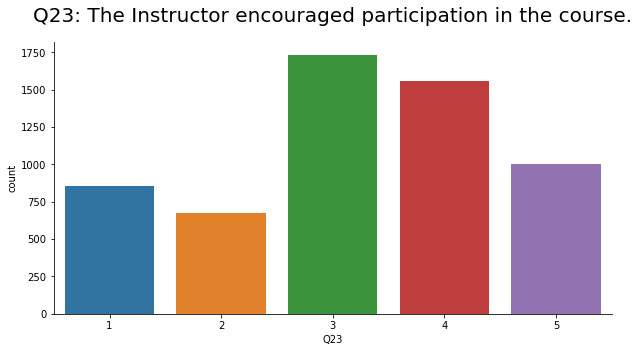

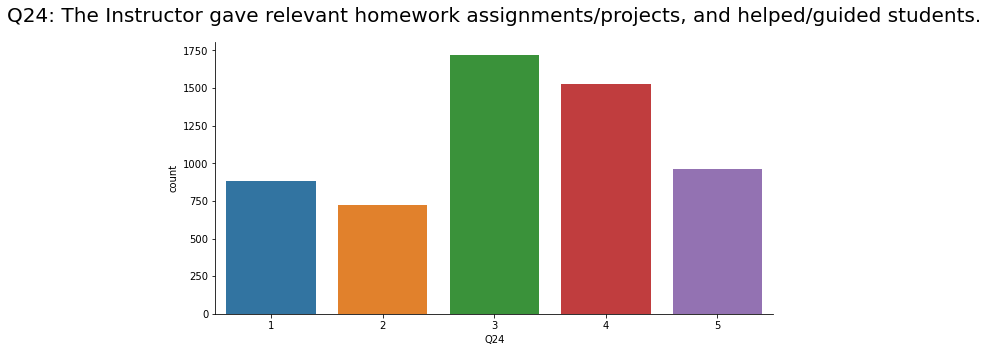

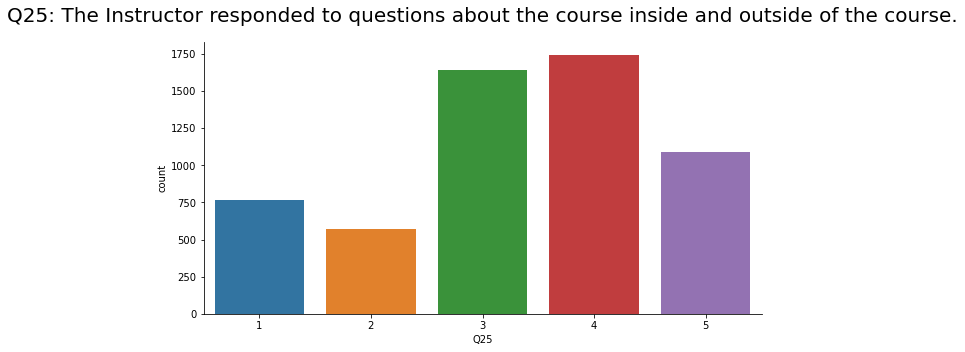

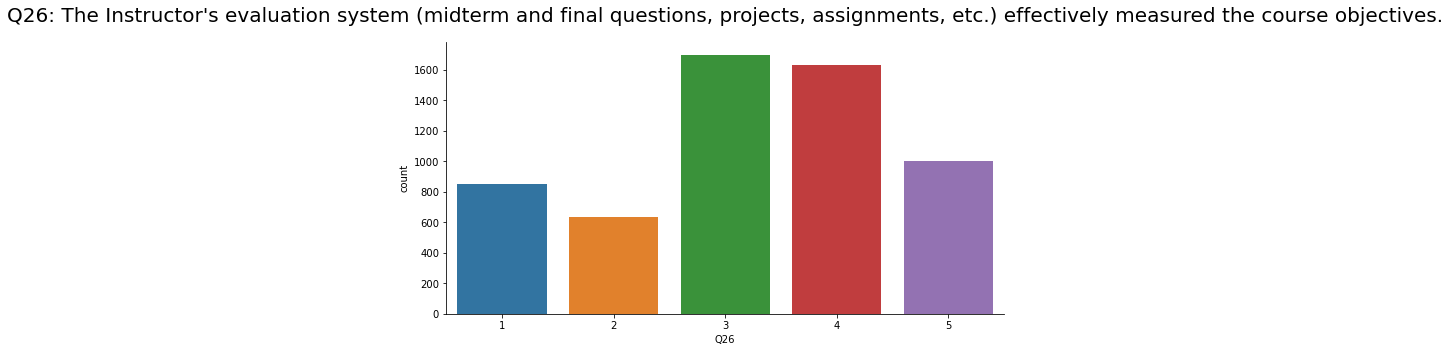

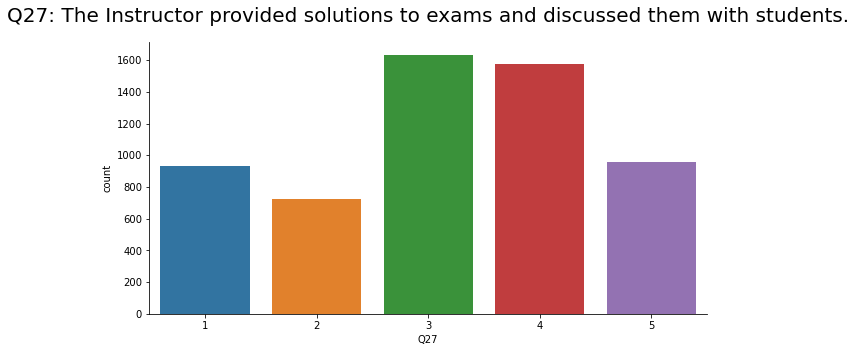

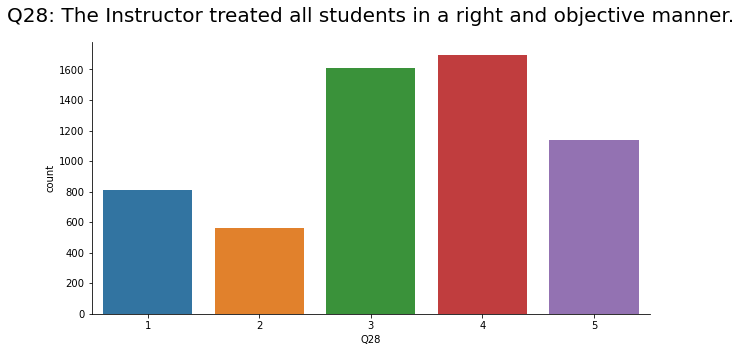

In [9]:
for i in range (len(col)):
    plt.figure(figsize=[10,5])
    sns.countplot(x=col[i],data=df)
    plt.title(titles[i], size=20, pad=20)
    sns.despine()
    plt.show()

#### 데이터 관측 결과 설문조사는 1-5 사이로 응답하는데 결측치는 없음을 확인할 수 있다.

## 2.3. Make Outliers

In [10]:
# 이상치 생성
for i in col:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    IQR = Q3 - Q1
    
    outlierNum = round(len(df) * random.randrange(3,5) / 100) # 3~5 % 이상치 생성
    flag = random.choice([True,False])
    
    for j in range(outlierNum):
        row = random.randrange(0,len(df))
        if flag:
            #df[i][row] = Q3 + (1.5)*IQR*(1+ random.random())
            df[i][row] = 0
        else:
            #df[i][row] = Q1 - (1.5)*IQR*(1+ random.random())
            df[i][row] = 0

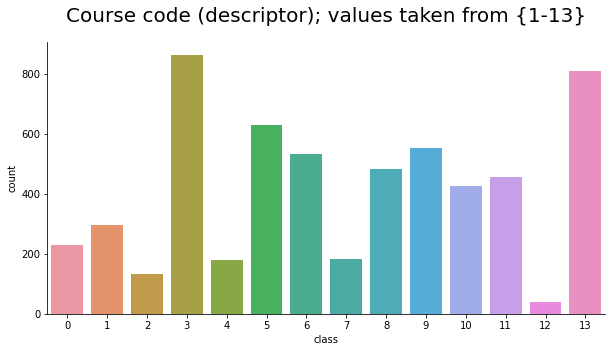

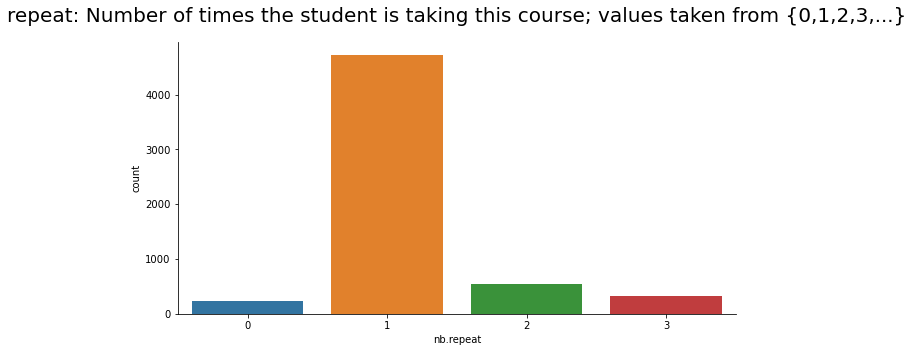

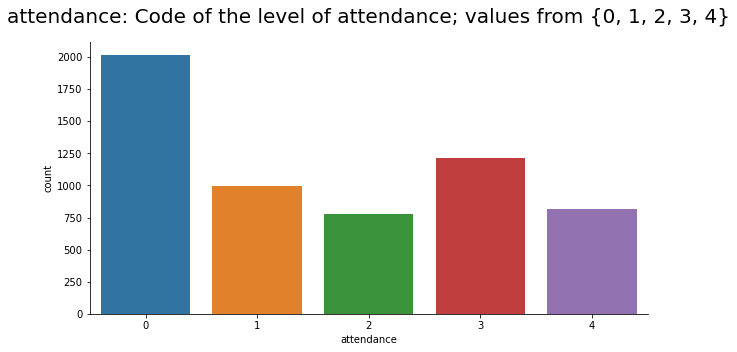

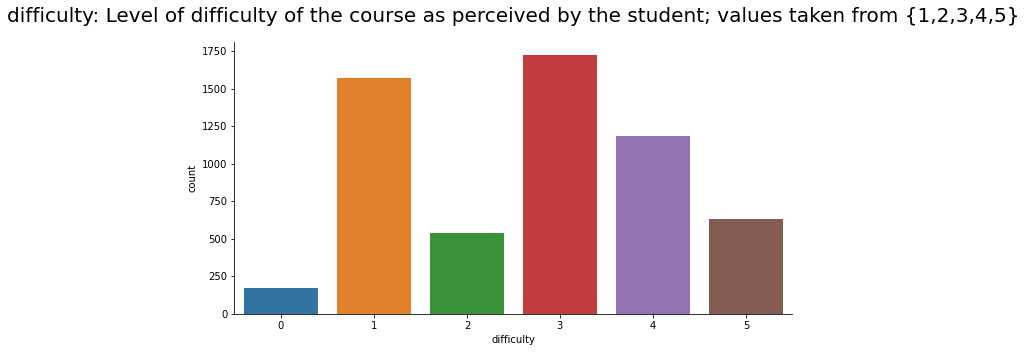

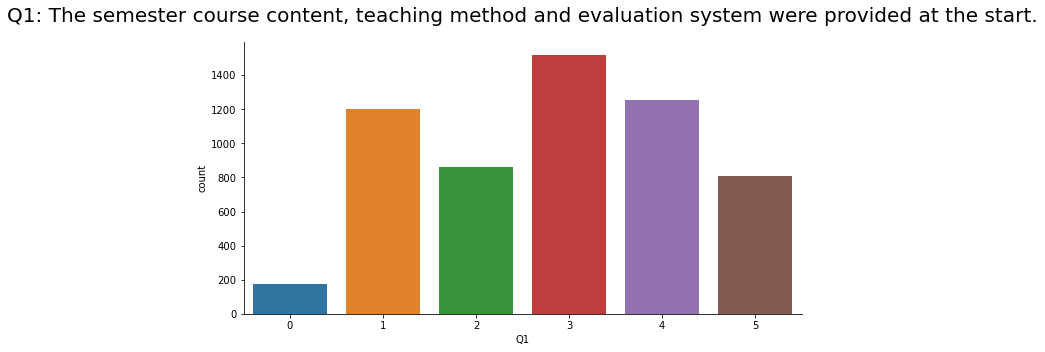

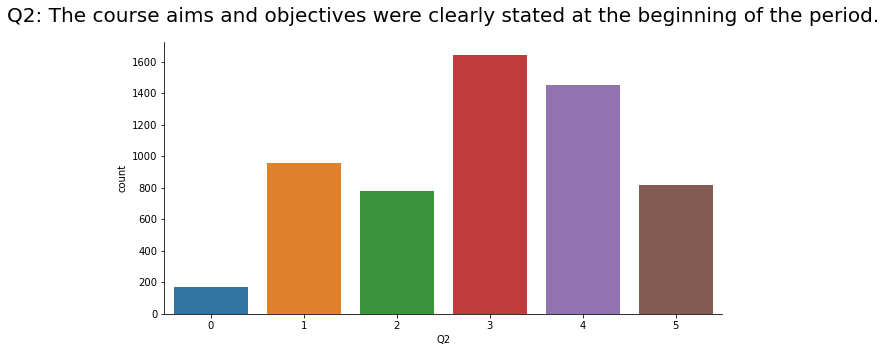

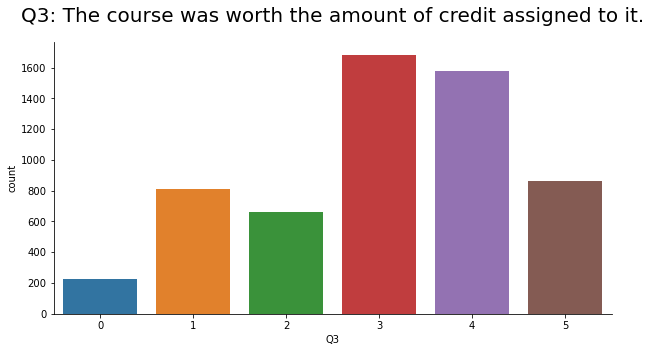

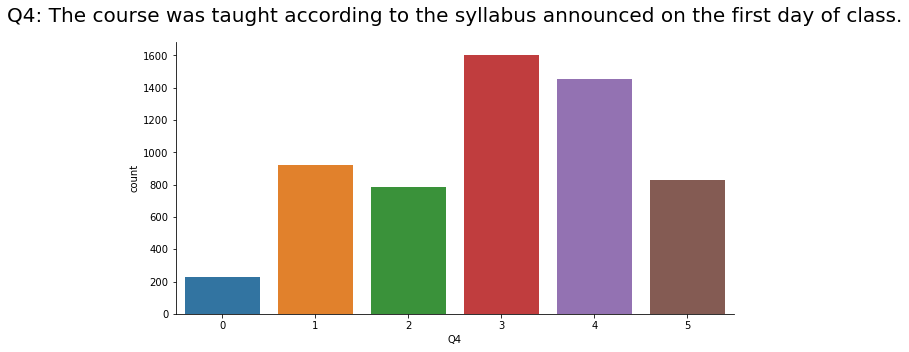

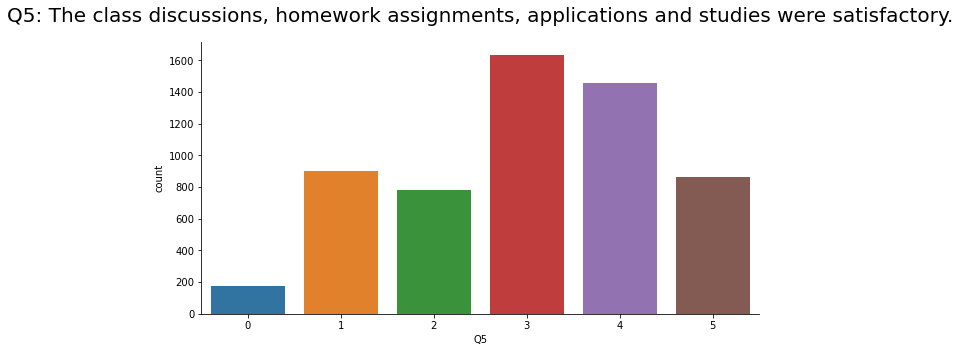

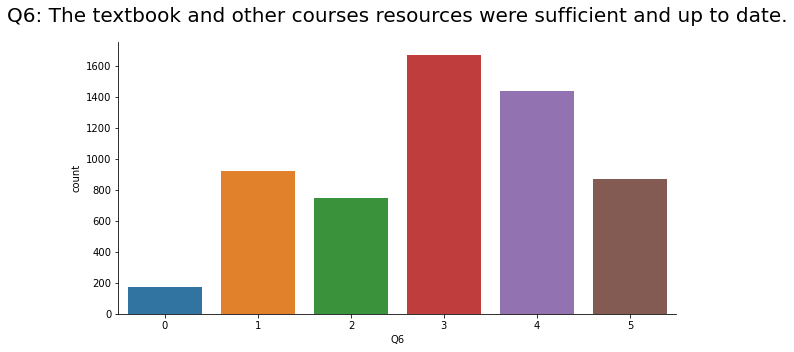

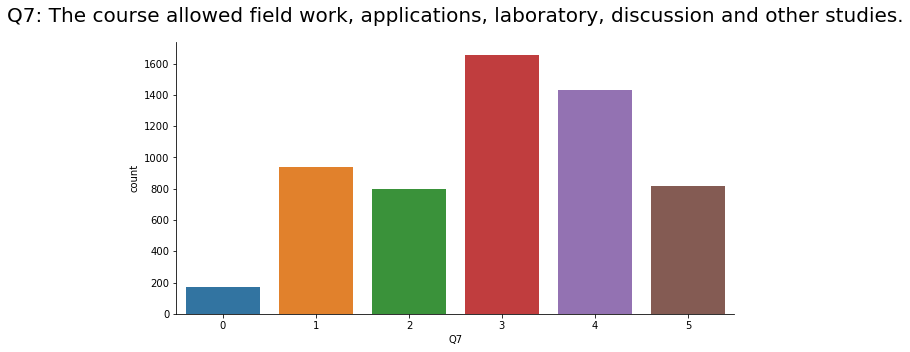

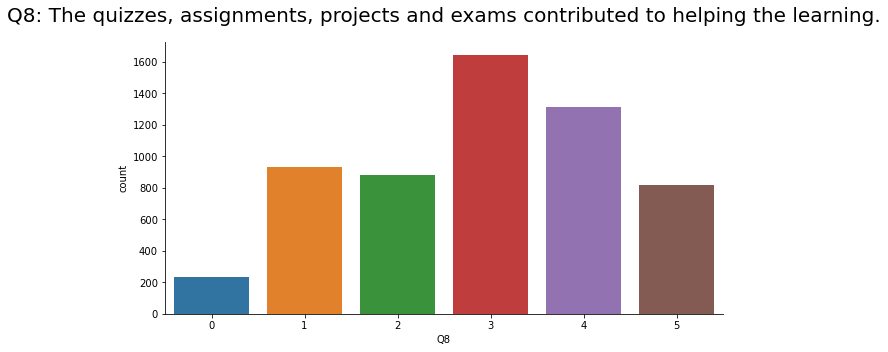

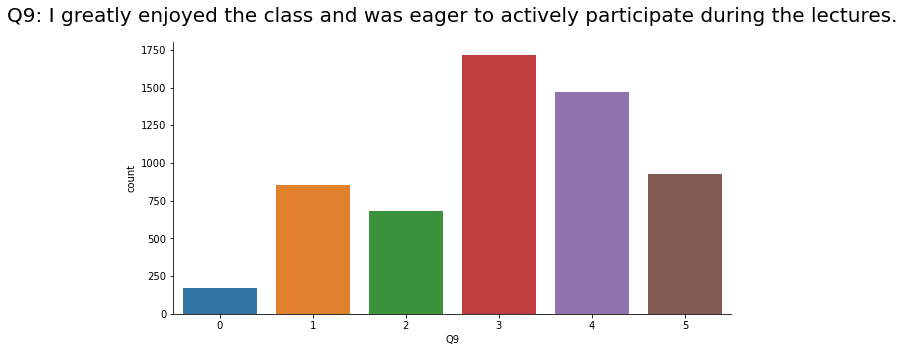

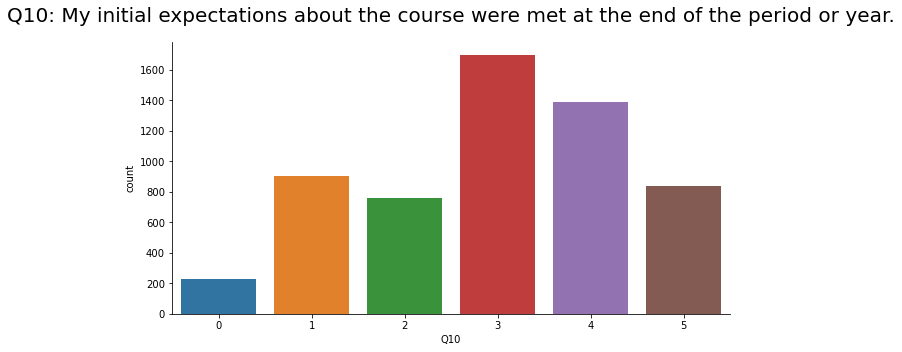

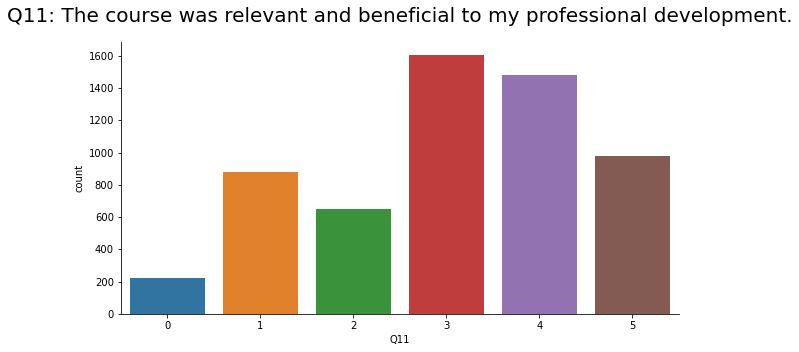

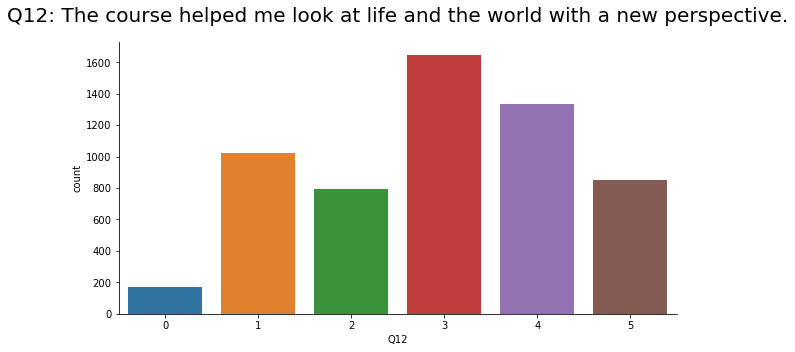

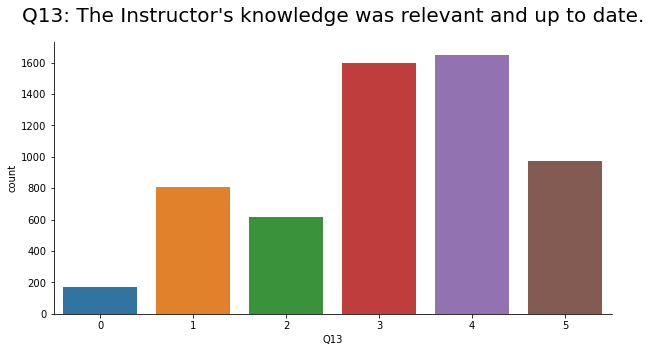

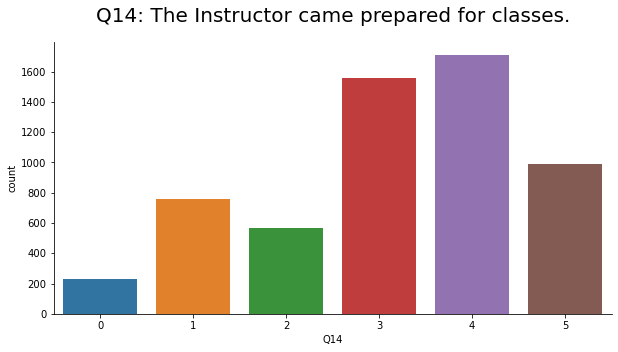

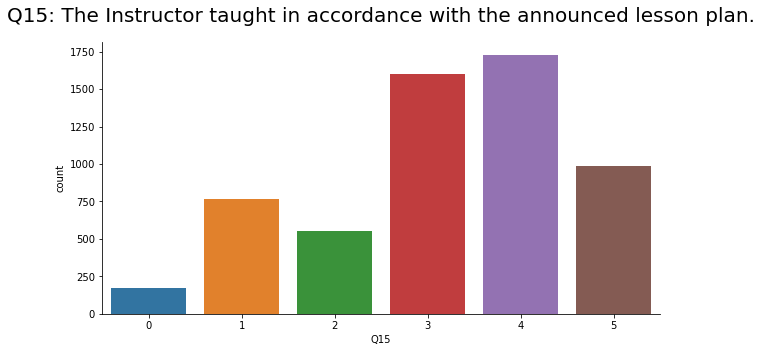

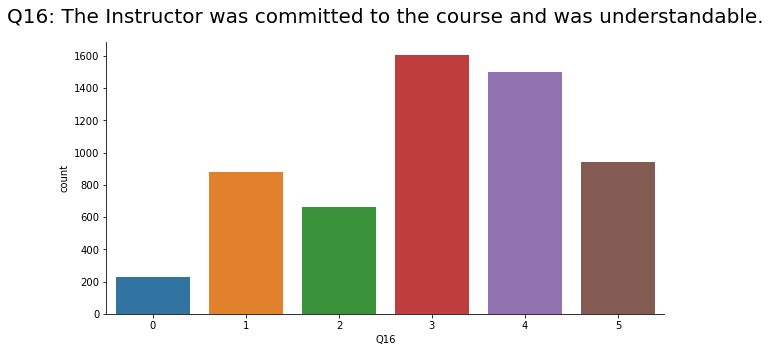

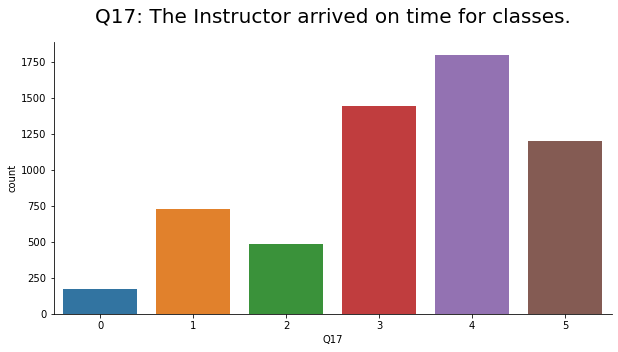

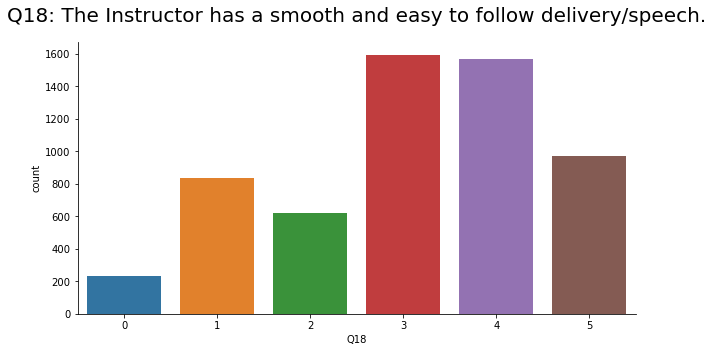

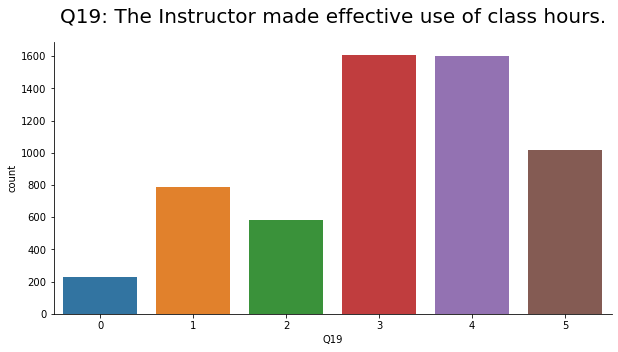

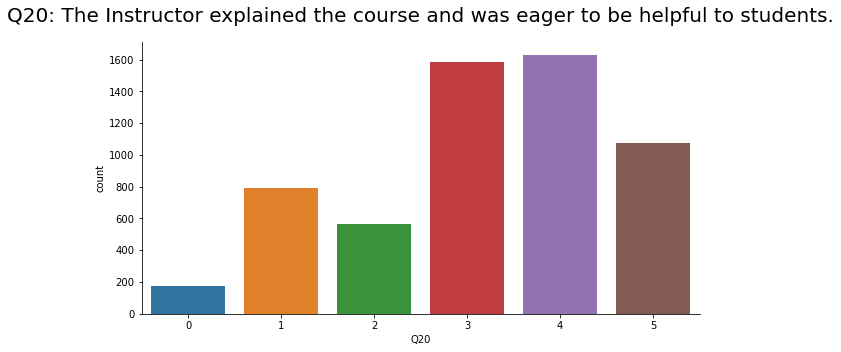

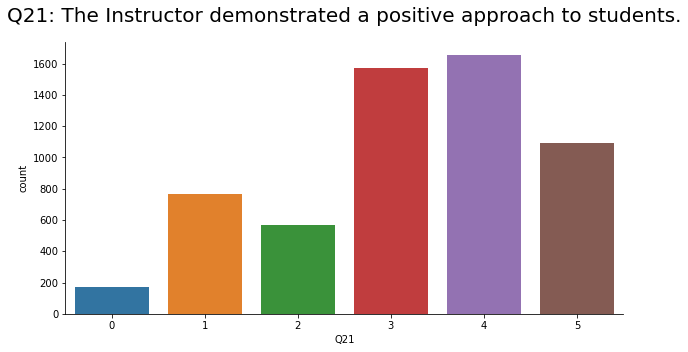

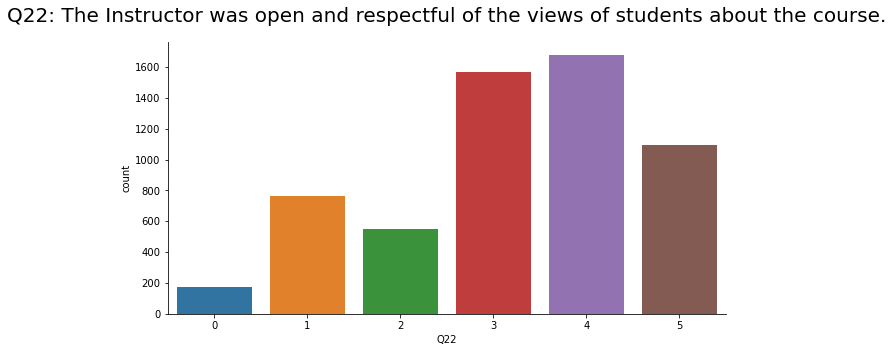

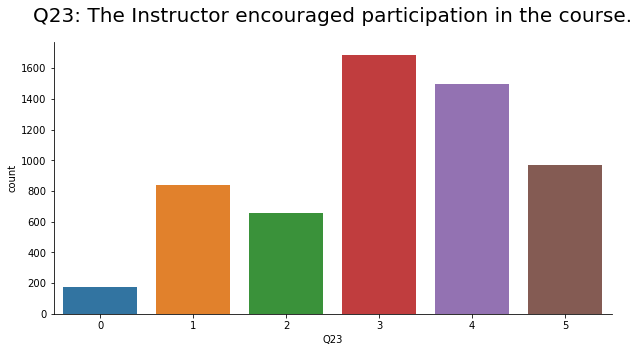

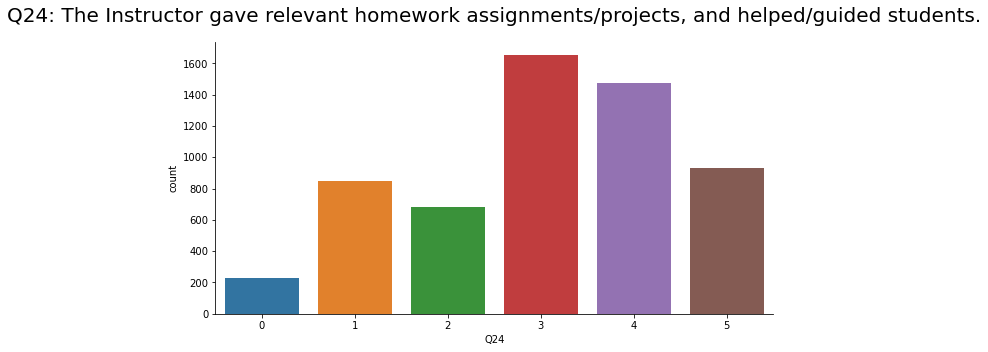

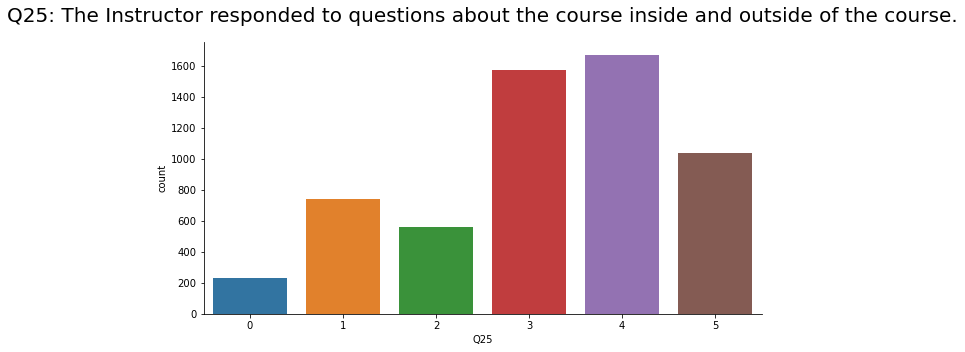

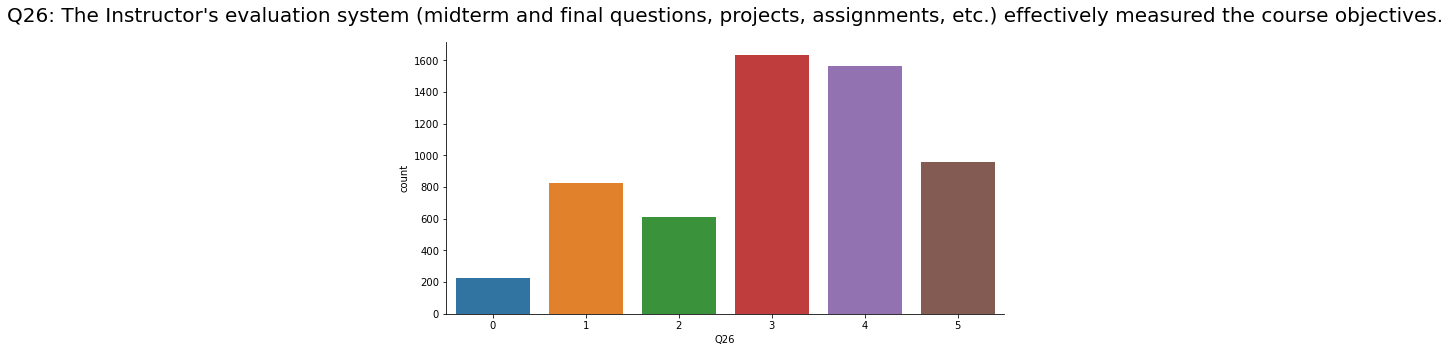

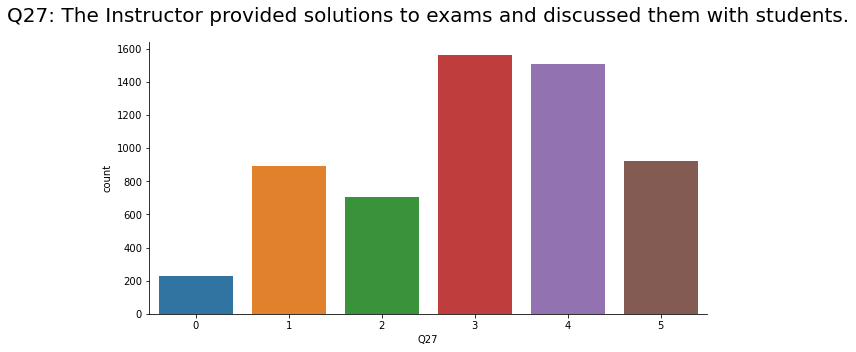

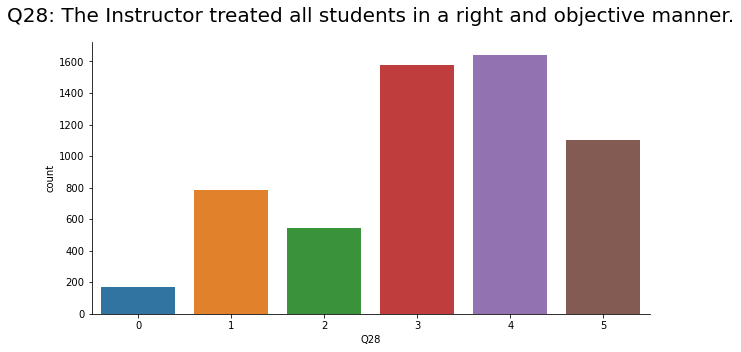

In [11]:
for i in range (len(col)):
    plt.figure(figsize=[10,5])
    sns.countplot(x=col[i],data=df)
    #plt.xticks(ticks=[0,1,2,3,4], labels=['Strongly disagree','Disagree','Neutral','Agree','Strongly agree'])
    plt.title(titles[i], size=20, pad=20)
    sns.despine()
    plt.show()

In [12]:
# ----------------------------------- 이상치 생성 확인 -------------------

In [13]:
input_y = pd.DataFrame(df['instr'])
input_x = df.drop(['instr'], axis=1)

In [14]:
input_y

,instr
0,1
1,1
2,1
3,1
4,1
...,...
5815,3
5816,3
5817,3
5818,3


In [15]:
input_x

,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,2,1,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,2,1,2,4,5,0,5,5,5,5,...,5,5,5,5,5,5,0,5,5,5
3,2,1,1,3,3,0,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2,1,0,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,13,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,13,1,3,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,0,1,0,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,0,5,5
5818,13,0,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## 2.4. Building Decision Tree model

In [16]:
# 학습, 테스트 데이터 분리 (0.7:0.3)
seed = 2022
x_train, x_test, y_train, y_test = train_test_split(input_x, input_y, test_size=0.7, random_state=seed)

In [17]:
dt_clf = DecisionTreeClassifier(random_state=seed)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=2022)

In [18]:
y_pred = dt_clf.predict(x_test) 

In [19]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train))
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = 'weighted')
precision = mt.precision_score(y_test, y_pred, average = 'weighted')
f1_score = mt.f1_score(y_test, y_pred, average = 'weighted')
matrix = mt.confusion_matrix(y_test, y_pred)

print("Accuracy :" ,mt.accuracy_score(y_test, y_pred))
print('Recall: ', mt.recall_score(y_test, y_pred, average = 'weighted'))
print('Precision: ', mt.precision_score(y_test, y_pred, average = 'weighted'))
print('F1_score: ', mt.f1_score(y_test, y_pred, average = 'weighted'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9994272623138603
Test_Accuracy :  0.9506627393225331 

Accuracy : 0.9506627393225331
Recall:  0.9506627393225331
Precision:  0.9510270408448734
F1_score:  0.950805997962471 

Confusion Matrix: 
 [[ 530    5   13]
 [   5  935   73]
 [   9   96 2408]]


In [20]:
# Finding the y_train_pred and the y_test_pred... 🔮

y_train_pred = dt_clf.predict(x_train)
y_test_pred = dt_clf.predict(x_test)

# Evaluating the model: (Confusion Matrix) 🤔😥⁉

print("Confusion Matrix for training set:\n")
print(mt.confusion_matrix(y_train, y_train_pred))
print('*'*20)
print("Confusion Matrix for test set:\n")
print(mt.confusion_matrix(y_test, y_test_pred))

Confusion Matrix for training set:

[[ 227    0    0]
 [   0  431    0]
 [   0    1 1087]]
********************
Confusion Matrix for test set:

[[ 530    5   13]
 [   5  935   73]
 [   9   96 2408]]


In [21]:
# 교차검증

x = input_x
y = input_y

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.929725085910653


In [22]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.013998,0.001000,0.862543
1,0.011999,0.001999,0.976804
2,0.013000,0.001000,0.980241
3,0.012002,0.000998,0.939003
4,0.009000,0.001000,0.890034


In [23]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9506627393225331

In [24]:
# Pruning Phase 진행
pruned_dt_clf = DecisionTreeClassifier(max_depth=6, random_state=seed)
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: ", pruned_dt_clf.score(x_train, y_train))
print("Accuracy of test set: ", pruned_dt_clf.score(x_test, y_test))

Accuracy of training set:  0.9753722794959908
Accuracy of test set:  0.9641629847815415


## 2.5. Comparing models

In [25]:
# 두 모델 비교
print("Before Pruning phase Accuracy : ", dt_clf.score(x_test, y_test), '\n')
print("After pruning phase Accuracy : ", pruned_dt_clf.score(x_test, y_test))

Before Pruning phase Accuracy :  0.9506627393225331 

After pruning phase Accuracy :  0.9641629847815415


In [26]:
# Find Optimal depth
def find_optimal_depth(DecisionTree, x_train, y_train):
    accuracy = []
    for i in range(1,DecisionTree.tree_.max_depth):
        pruning = DecisionTreeClassifier(max_depth=i, random_state=seed)
        pruning.fit(x_train, y_train)
        accuracy.append(pruning.score(x_test, y_test))
    print("최대 depth : ", accuracy.index(max(accuracy))+1)
    print("최대 Accuracy : " , max(accuracy))

In [27]:
find_optimal_depth(dt_clf, x_train, y_train)

최대 depth :  6
최대 Accuracy :  0.9641629847815415


#### Pruning Phase 시각화를 위한 준비단계

In [28]:
feature_names = input_x.columns.tolist()
feature_names = feature_names[:]
feature_names

['class',
 'nb.repeat',
 'attendance',
 'difficulty',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28']

In [29]:
target_names = df['instr']
target_names = list(map(str,target_names.drop_duplicates()))
target_names

['1', '2', '3']

## 2.6. Visualize with plot_tree

### visualize with plot_tree

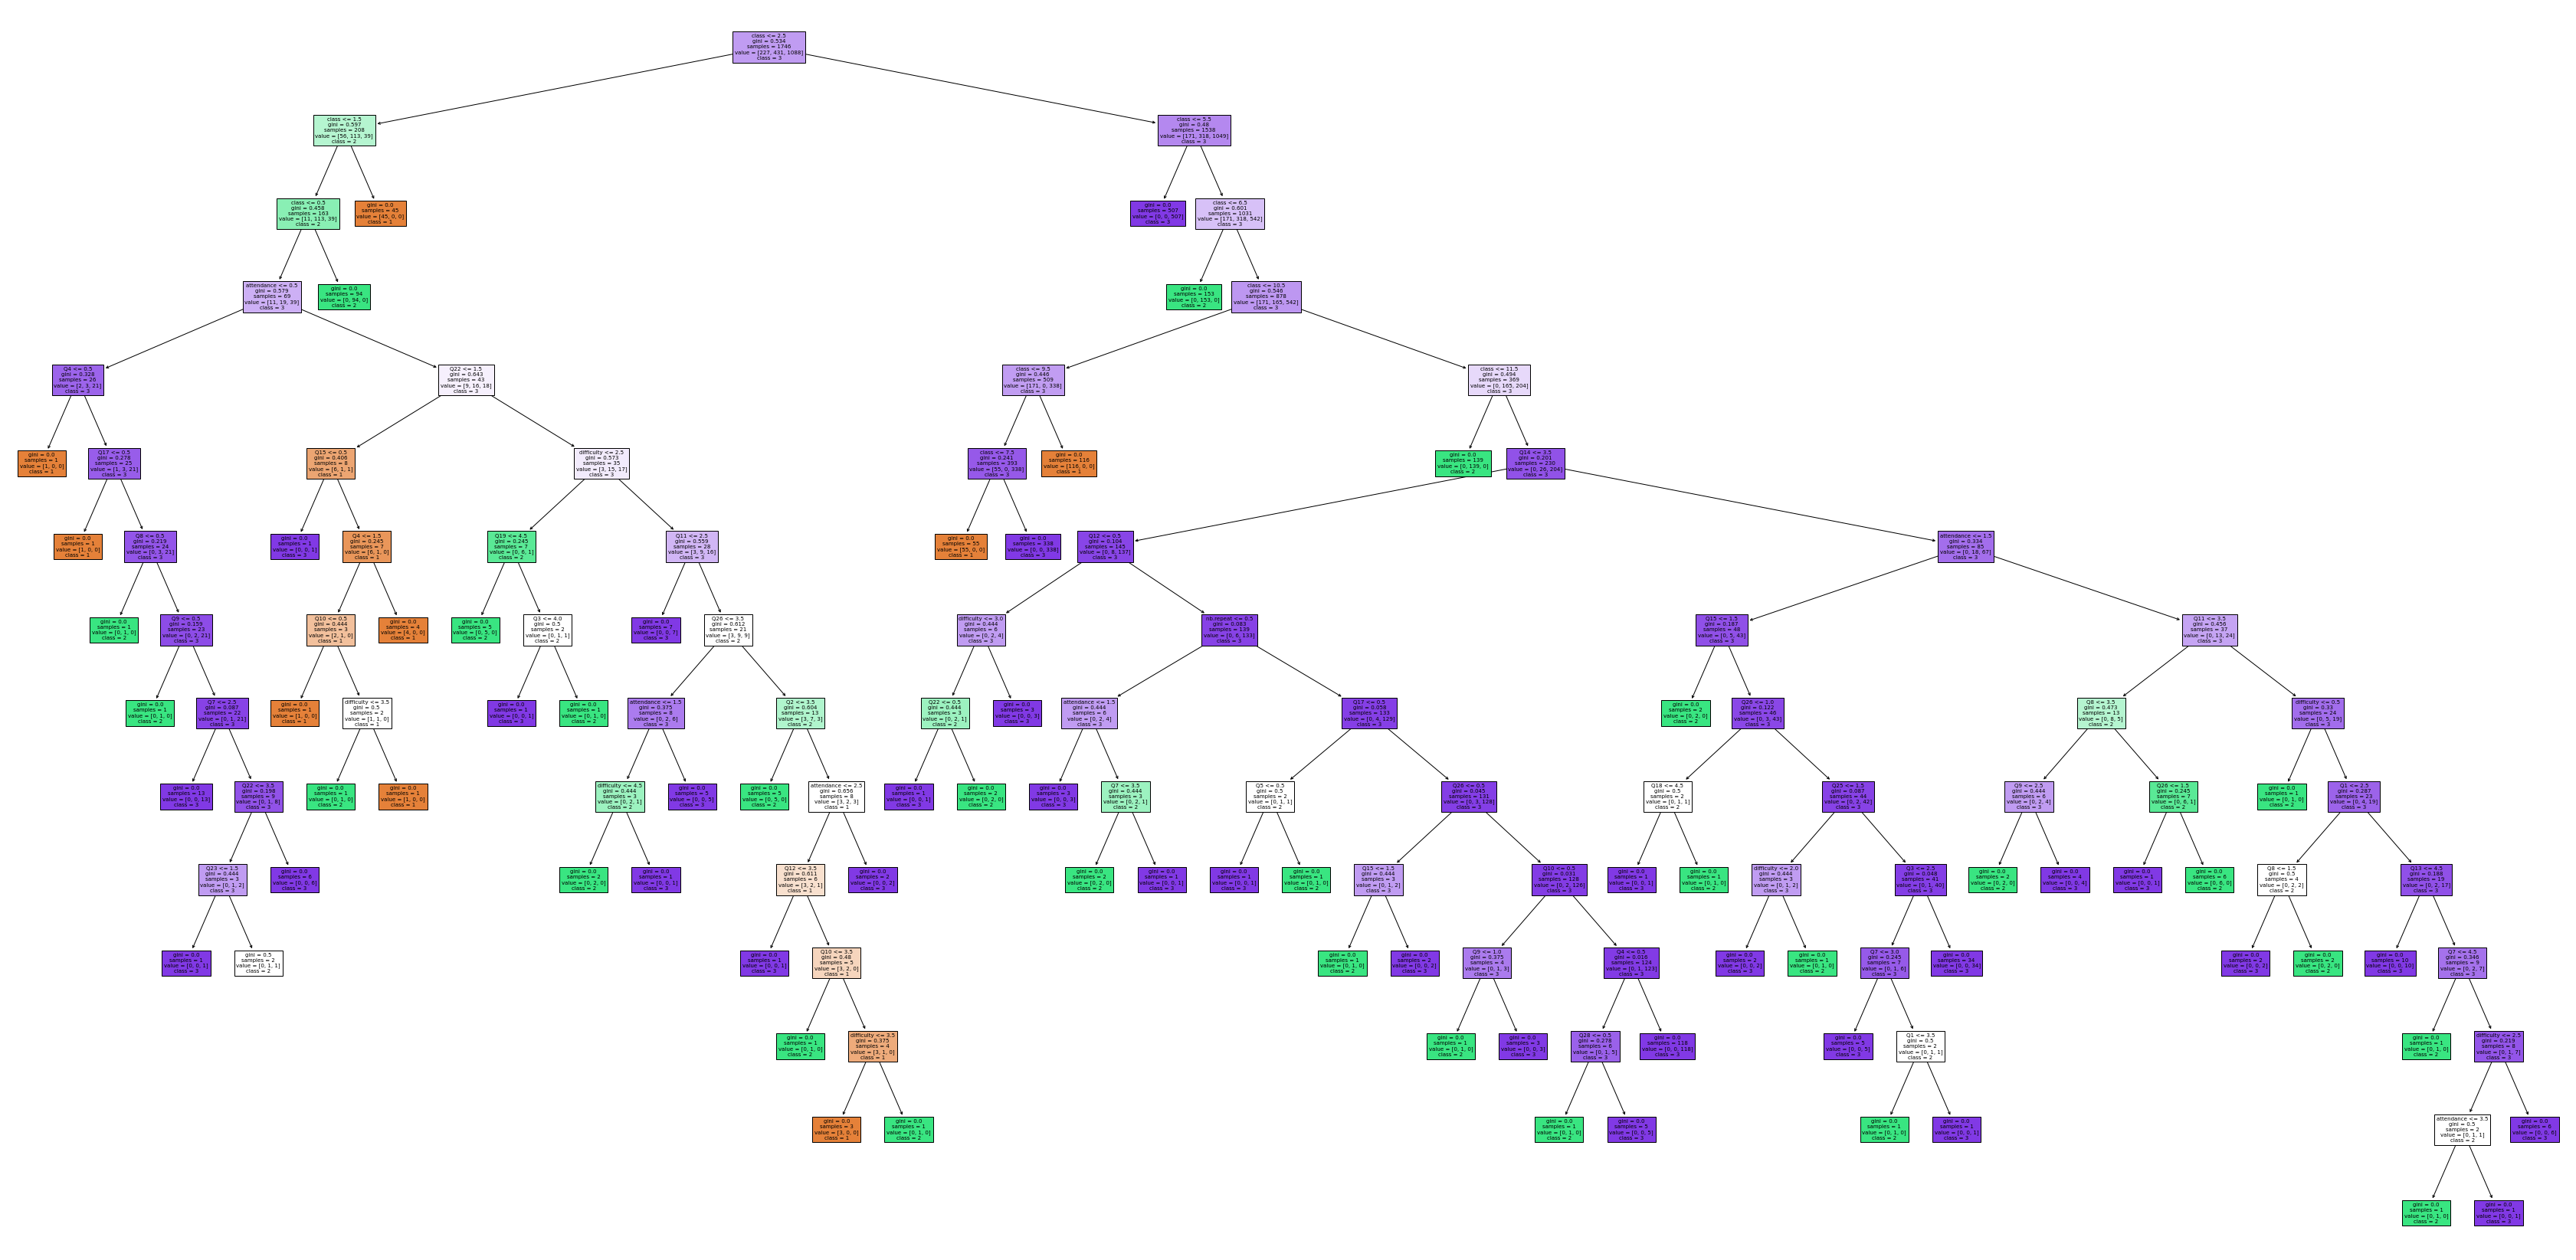

In [30]:
# visualize with plot_tree
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt_clf, feature_names = feature_names, class_names=target_names, filled=True);

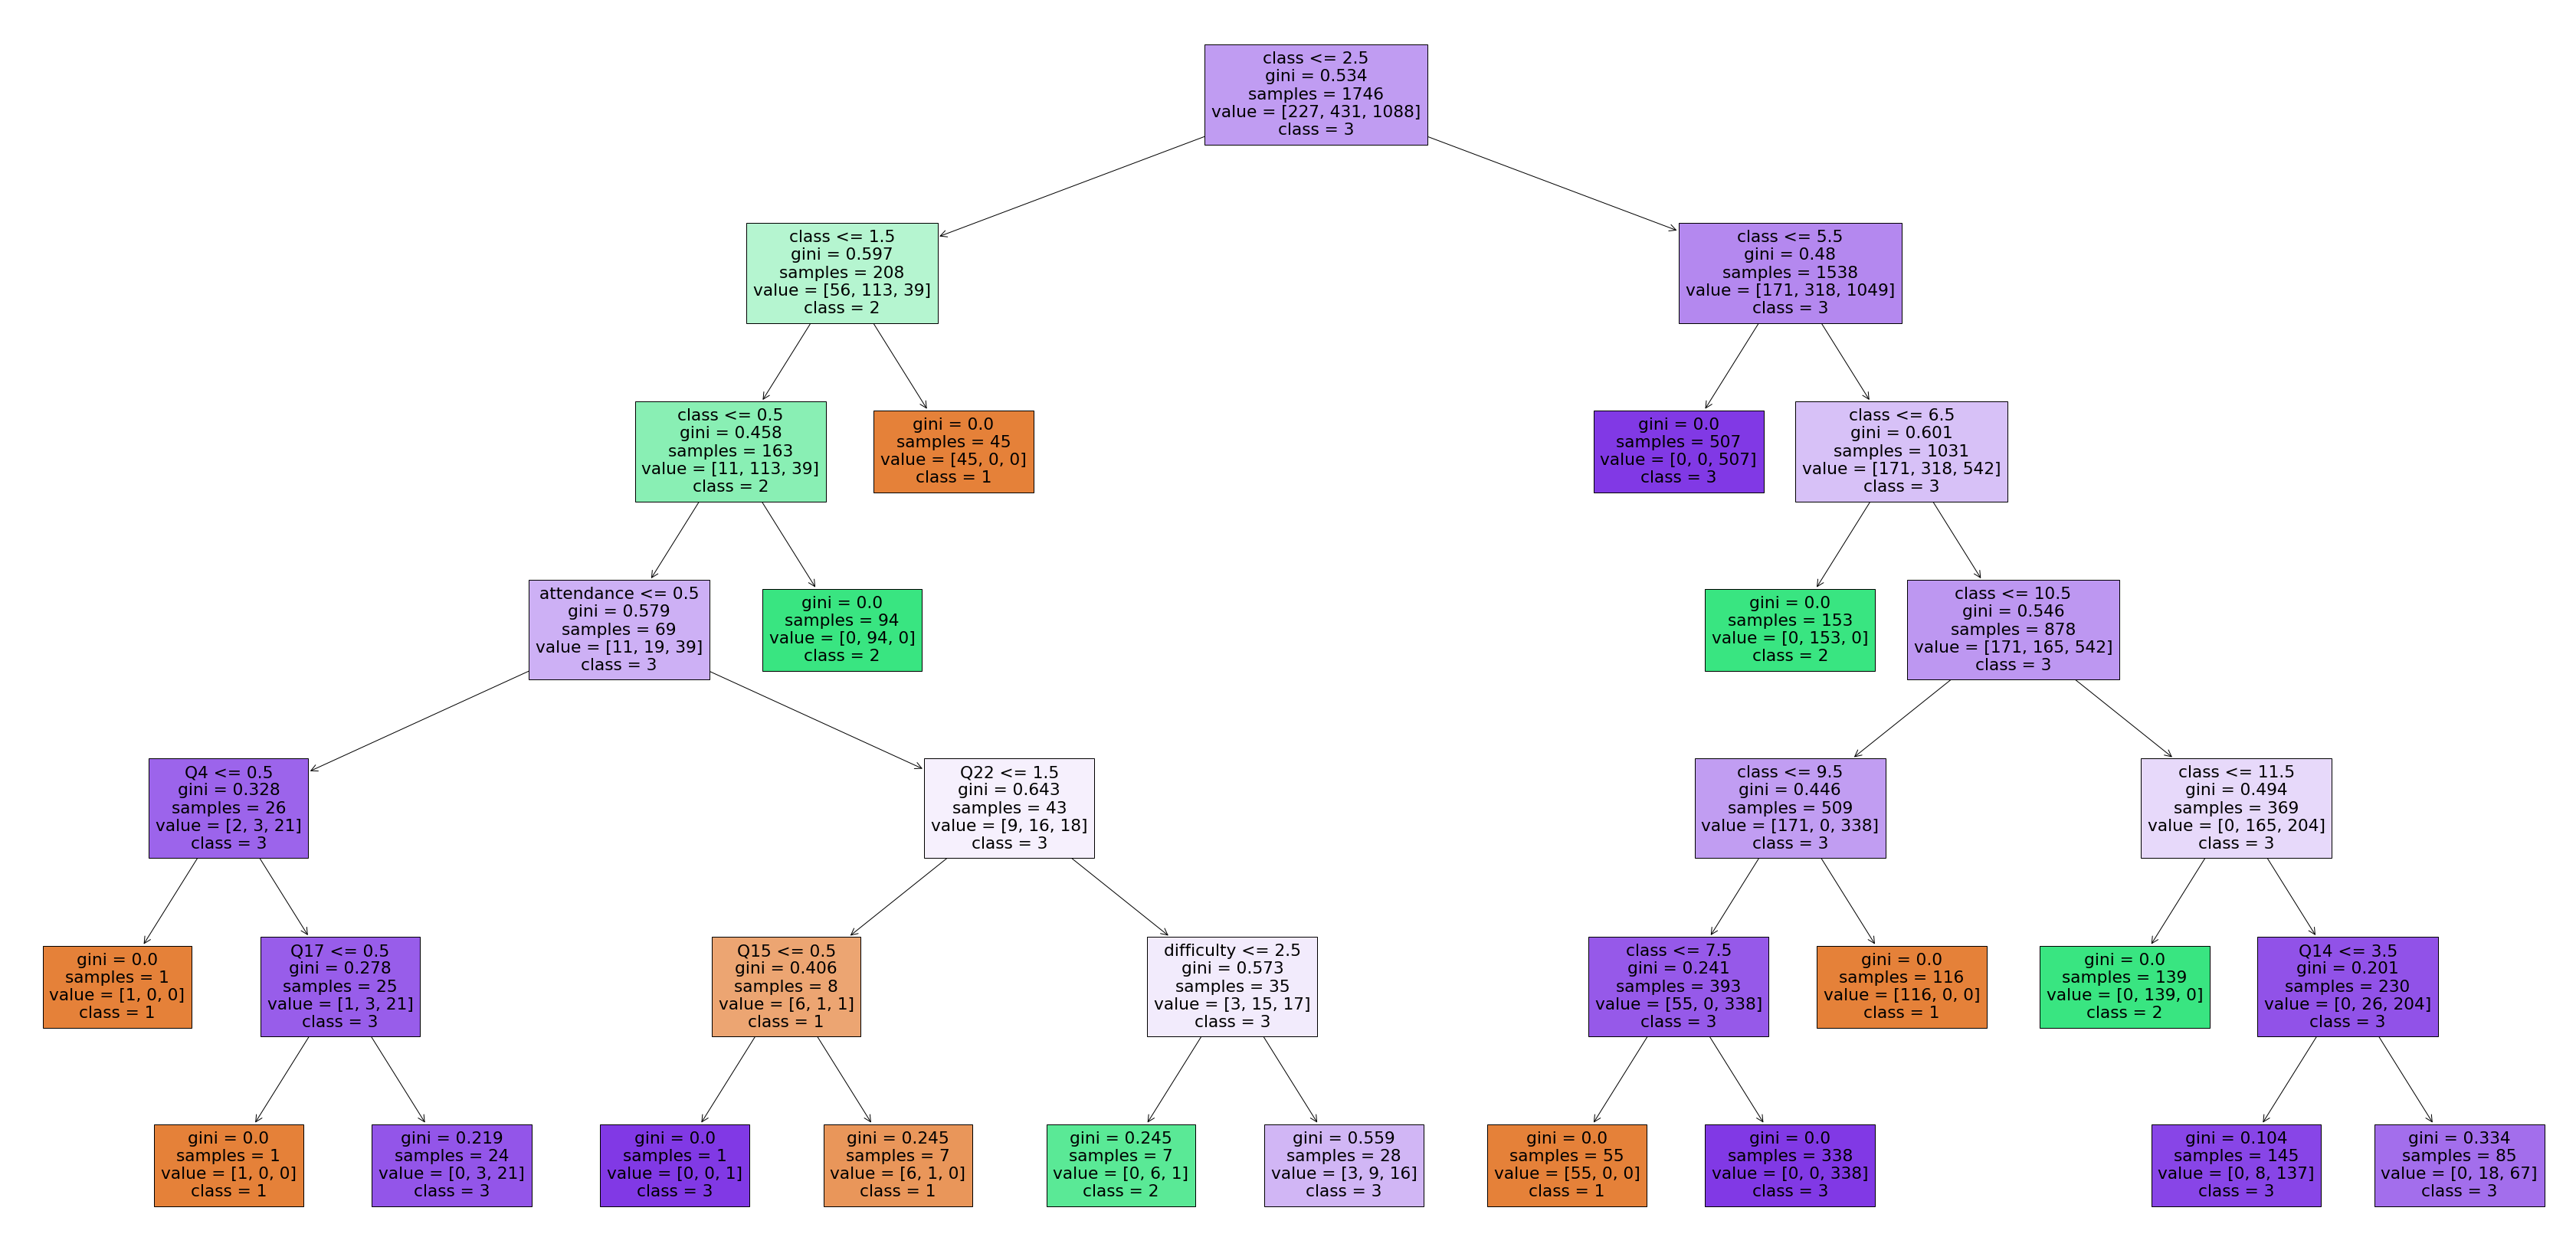

In [31]:
plt.figure(figsize=(60,30))
plot_tree(pruned_dt_clf, feature_names = feature_names, class_names=target_names, filled=True);

### visualize with Graphviz

In [32]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = target_names, 
                feature_names = feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


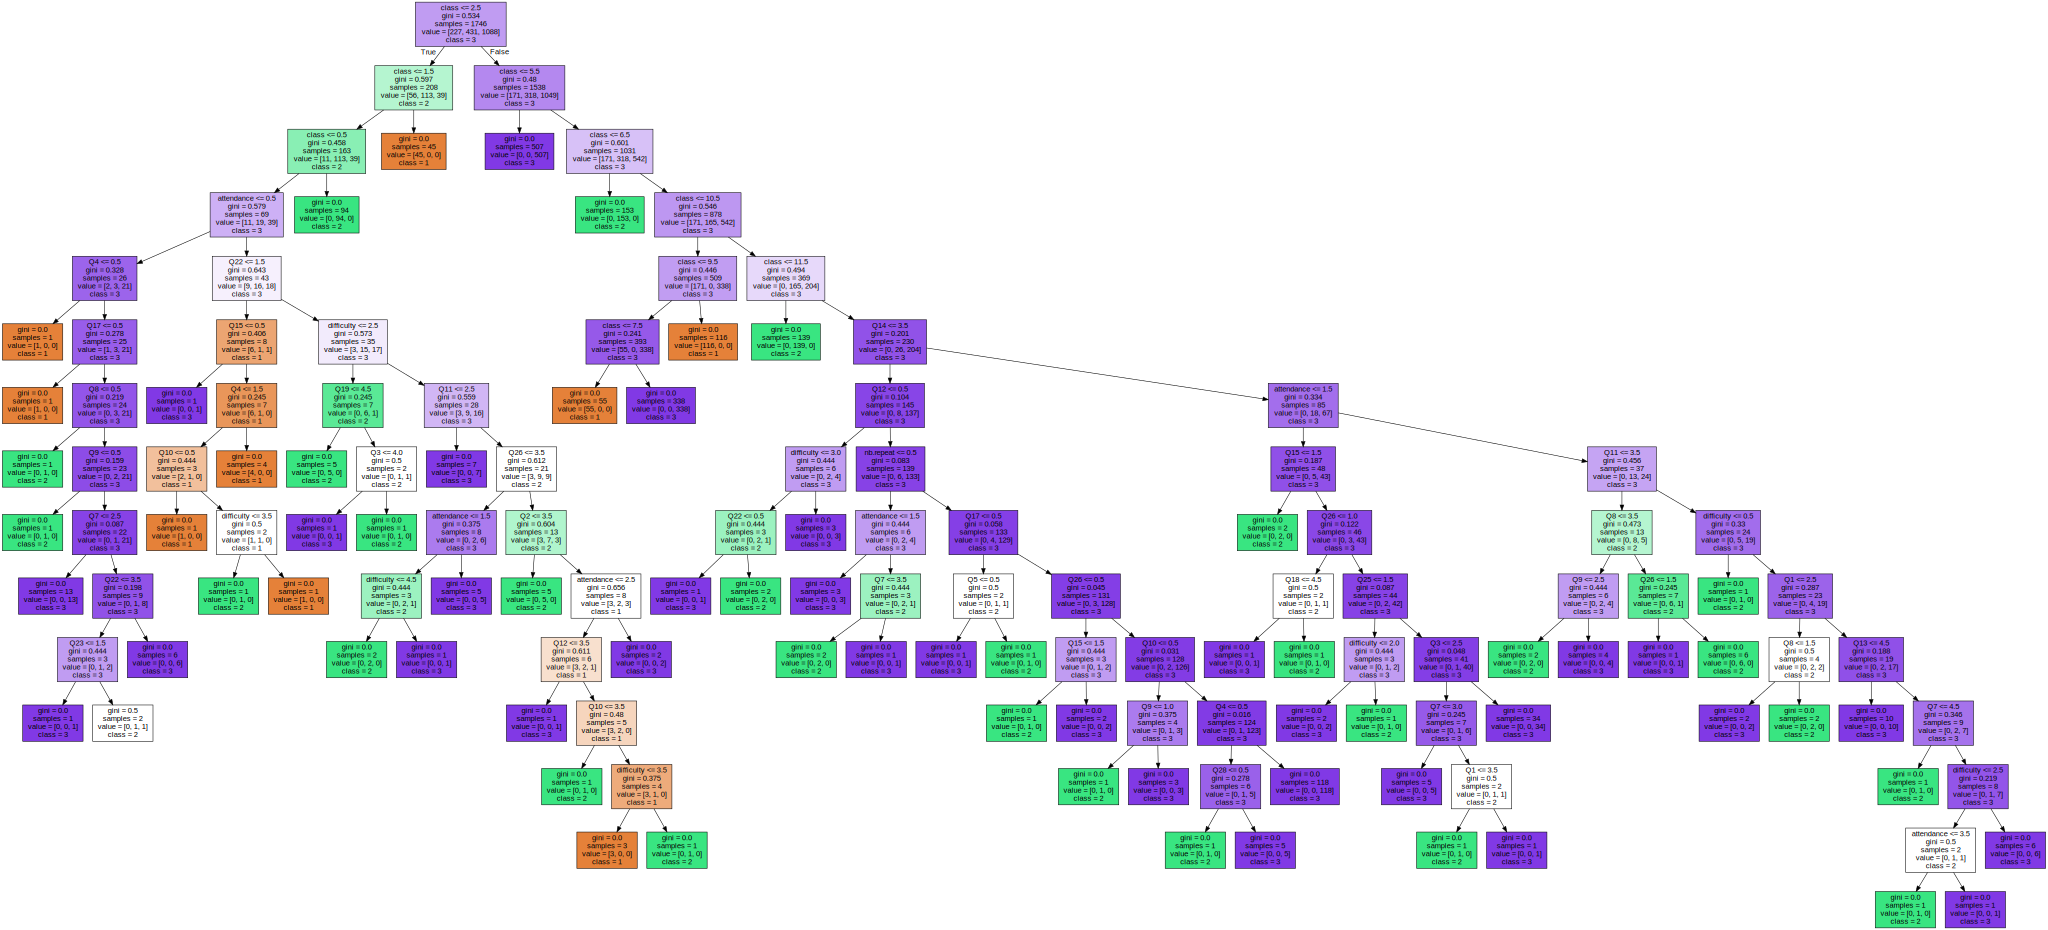

In [33]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [34]:
dt_clf.tree_.max_depth

14

### After Pruning phase Visualization

In [35]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=7, random_state=seed)
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: ", pruned_dt_clf.score(x_train, y_train))
print("Accuracy of test set: ", pruned_dt_clf.score(x_test, y_test))

Accuracy of training set:  0.9759450171821306
Accuracy of test set:  0.961953853706431


In [36]:
# pruning phase 진행
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = target_names, 
                feature_names = feature_names, impurity=True, filled=True)


[ max_depth가 2인 경우의 Decision Tree 시각화 ]


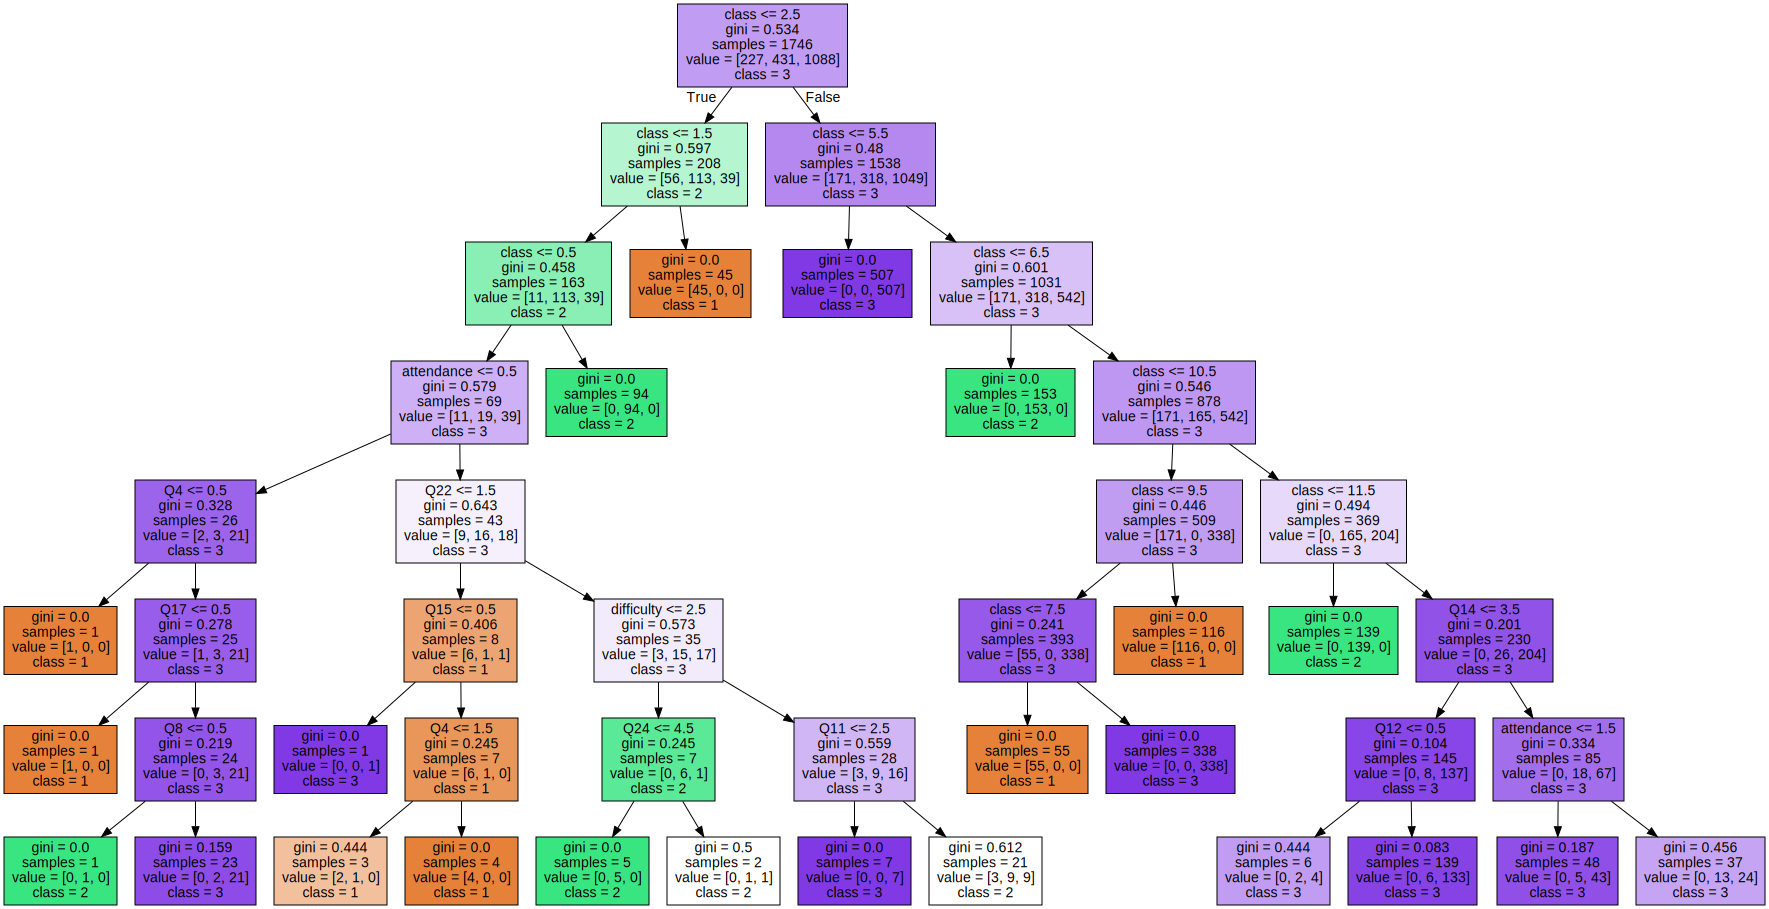

In [37]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Creating a Model Without Outliers

In [38]:
df2 = pd.read_csv("turkiye-student-evaluation_generic.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [39]:
df2.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [40]:
no_outliers_input_y = pd.DataFrame(df2['instr'])
no_outliers_input_x = df2.drop(['instr'], axis=1)

In [41]:
no_outliers_input_y

,instr
0,1
1,1
2,1
3,1
4,1
...,...
5815,3
5816,3
5817,3
5818,3


In [42]:
no_outliers_input_x

,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,2,1,0,4,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,2,1,2,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,2,1,1,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,13,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,13,1,3,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,13,1,0,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,13,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [43]:
# 학습, 테스트 데이터 분리 (0.7:0.3)
seed = 2022
no_outliers_x_train, no_outliers_x_test, no_outliers_y_train, no_outliers_y_test = train_test_split(no_outliers_input_x, no_outliers_input_y, test_size=0.7, random_state=seed)

In [44]:
no_outlier = DecisionTreeClassifier(random_state=seed)
no_outlier.fit(no_outliers_x_train, no_outliers_y_train)

DecisionTreeClassifier(random_state=2022)

In [45]:
print("Accuracy of training set without outlier: ", no_outlier.score(x_train, y_train))
print("Accuracy of test set without outlier: ", no_outlier.score(no_outliers_x_test, no_outliers_y_test))

Accuracy of training set without outlier:  0.9639175257731959
Accuracy of test set without outlier:  0.9712812960235641


## 2.7. 이상치 생성 전후 모델 정확도 비교

In [46]:
print("with outliers : ", dt_clf.score(x_test, y_test), '\n')
print("without outliers: ", no_outlier.score(no_outliers_x_test, no_outliers_y_test))

with outliers :  0.9506627393225331 

without outliers:  0.9712812960235641
